In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Data and Displaying Information
data= pd.read_csv('C:/Users/umitk/OneDrive/Documents/HouseSalesPrediction/data/FeatureEngineering.csv')

print('The data have ', data.shape[0], ' rows and ', data.shape[1], ' columns\n')

The data have  1449  rows and  251  columns



In [3]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fireplaces_1,Fireplaces_2,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.075512,-0.226204,-0.327615,0.652617,1.056113,0.878501,0.559706,0.603282,-0.337121,-0.942296,...,False,False,False,True,False,False,False,True,False,False
1,-0.870802,0.524413,-0.063767,-0.069799,0.144090,-0.428527,-0.597544,1.223865,-0.337121,-0.638981,...,True,False,False,True,False,False,True,False,False,False
2,0.075512,-0.076080,0.314799,0.652617,0.988555,0.830093,0.358958,0.101339,-0.337121,-0.299450,...,True,False,False,True,False,False,False,True,False,False
3,0.312091,-0.476410,-0.075238,0.652617,-1.916407,-0.718977,-0.597544,-0.514680,-0.337121,-0.059514,...,True,False,False,False,True,False,False,False,False,False
4,0.075512,0.724578,1.005395,1.375034,0.954777,0.733276,1.468973,0.486922,-0.337121,-0.172692,...,True,False,False,False,True,False,False,True,False,False


In [4]:
# Split the data into features (X) and target variable (y)
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Print shapes of training and testing subsets
print("X Training data shape:", X_train.shape)
print("X Testing data shape:", X_test.shape)

X Training data shape: (1159, 250)
X Testing data shape: (290, 250)


In [7]:
# Print shapes of training and testing subsets
print("y Training data shape:", y_train.shape)
print("y Testing data shape:", y_test.shape)

y Training data shape: (1159,)
y Testing data shape: (290,)


In [8]:
#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

In [9]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'XGBoost': XGBRegressor()
}

In [10]:
# Model hyperparameters for tuning
params = {
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]}
}

## Linear Regression

The Linear Regression model, as currently configured, is not recommended for predicting house prices in this dataset. Further analysis, feature engineering, or alternative modeling approaches may be necessary to build a more effective predictive model.

In [11]:
# Train and evaluate Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
# Cross-validation for Linear Regression
cv_scores_lin_reg = cross_val_score(lin_reg, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
cv_rmse_lin_reg = np.sqrt(-cv_scores_lin_reg)
mean_cv_rmse_lin_reg = np.mean(cv_rmse_lin_reg)

In [13]:
# Predictions for Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

In [14]:
# Evaluation for Linear Regression
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

In [15]:
print('Linear Regression Evaluation Results:\n')
print("CV RMSE:", mae_lin_reg)
print("MAE:", mae_lin_reg)
print("MSE:", mse_lin_reg)
print("RMSE:", rmse_lin_reg)
print("R2SCORE:", r2_lin_reg)

Linear Regression Evaluation Results:

CV RMSE: 27338735.214343283
MAE: 27338735.214343283
MSE: 1.0294617883344216e+17
RMSE: 320852269.4846371
R2SCORE: -1.2568177024109816e+17


##### The model exhibits very high errors, as indicated by the extremely large values for CV RMSE, MAE, MSE, and RMSE. These high error values suggest that the model's predictions deviate significantly from the actual target values.  A negative R2 score suggests that the model performs worse than a simple horizontal line, indicating that it fails to capture the variance in the data and may even perform worse than just using the mean value as predictions. The combination of high errors and a negative R2 score could be symptomatic of overfitting. Overfitting occurs when the model captures noise in the training data rather than the underlying pattern. As a result, the model performs poorly on unseen data.

## Decision Tree

the Decision Tree model appears to be a strong candidate for predicting house prices in this dataset. It demonstrates low errors, high explanatory power, and good generalization capabilities. Therefore, it is recommended for further consideration and potentially deployment in real-world applications. However, it's essential to keep in mind that Decision Trees may prone to overfitting on complex datasets, and further validation on unseen data is advisable before final deployment.

In [16]:
# Train and evaluate Decision Tree
dt_reg = DecisionTreeRegressor()
grid_search_dt_reg = GridSearchCV(dt_reg, params['Decision Tree'], cv=5, scoring='neg_mean_squared_error')
grid_search_dt_reg.fit(X_train_scaled, y_train)
dt_reg_best = grid_search_dt_reg.best_estimator_

In [17]:
# Cross-validation for Decision Tree
cv_scores_dt_reg = cross_val_score(dt_reg_best, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
cv_rmse_dt_reg = np.sqrt(-cv_scores_dt_reg)
mean_cv_rmse_dt_reg = np.mean(cv_rmse_dt_reg)

In [18]:
# Prediction for Decision Tree
y_pred_dt_reg = dt_reg_best.predict(X_test_scaled)

In [19]:
# Evaluation for Decision Tree
mae_dt_reg = mean_absolute_error(y_test, y_pred_dt_reg)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
rmse_dt_reg = np.sqrt(mse_dt_reg)
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)

In [20]:
print('Decision Tree Evaluation Results:\n')
print('CV RMSE: ', mean_cv_rmse_dt_reg)
print('MAE: ', mae_dt_reg)
print('MSE: ', mse_dt_reg)
print('RMSE: ', rmse_dt_reg)
print('R2 SCORE: ', r2_dt_reg)

Decision Tree Evaluation Results:

CV RMSE:  0.4848723118650623
MAE:  0.2778755655964397
MSE:  0.1505881904986034
RMSE:  0.3880569423404295
R2 SCORE:  0.816154513224924


##### The model demonstrates relatively low errors across all metrics, with CV RMSE, MAE, MSE, and RMSE values close to 0. This suggests that the model's predictions align well with the actual target values. The high R-squared (R2) score of approximately 0.83 indicates that the model explains a significant proportion of the variance in the target variable. This suggests that the Decision Tree model captures the underlying patterns in the data quite effectively.

## Random Forest

The Random Forest model appears to be highly effective for predicting house prices in this dataset. It demonstrates low errors, high explanatory power, and good generalization capabilities. Therefore, it is recommended for further consideration and potentially deployment in real-world applications. However, it's essential to keep in mind that Random Forest models can be computationally expensive and may require tuning for optimal performance on larger datasets. Additionally, monitoring for potential overfitting is advisable during model development and deployment.

In [21]:
# Train and evaluate Random Forest
rf_reg = RandomForestRegressor()
grid_search_rf_reg = GridSearchCV(rf_reg, params['Random Forest'], cv=5, scoring='neg_mean_squared_error')
grid_search_rf_reg.fit(X_train_scaled, y_train)
rf_reg_best = grid_search_rf_reg.best_estimator_

In [22]:
# Cross-validation for Random Forest
cv_scores_rf_reg = cross_val_score(rf_reg_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_rf_reg = np.sqrt(-cv_scores_rf_reg)
mean_cv_rmse_rf_reg = np.mean(cv_rmse_rf_reg)

In [23]:
# Predictions for Random Forest
y_pred_rf_reg = rf_reg_best.predict(X_test_scaled)

In [24]:
# Evaluation for Random Forest
mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mse_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

In [25]:
print('Random Forest Evaluation Results:\n')
print('CV RMSE: ', mean_cv_rmse_rf_reg)
print('MAE: ', mae_rf_reg)
print('MSE: ', mse_rf_reg)
print('RMSE: ', rmse_rf_reg)
print('R2 SCORE: ', r2_rf_reg)

Random Forest Evaluation Results:

CV RMSE:  0.3761914660912935
MAE:  0.19060302870586152
MSE:  0.08653059047488355
RMSE:  0.2941608241674672
R2 SCORE:  0.8943591892955427


##### The model demonstrates low errors across all metrics, with CV RMSE, MAE, MSE, and RMSE values relatively close to 0. This indicates that the model's predictions closely match the actual target values. The high R-squared (R2) score of approximately 0.90 indicates that the model explains a significant proportion of the variance in the target variable. This suggests that the Random Forest model captures the underlying patterns in the data quite effectively.

## Gradient Boosting

The Gradient Boosting model demonstrates strong performance for predicting house prices in this dataset. It exhibits low errors, high explanatory power, and good generalization capabilities. Therefore, it is recommended for further consideration and potential deployment in real-world applications. However, as with any machine learning model, it's important to monitor for potential overfitting and to tune hyperparameters carefully to optimize performance on unseen data.

In [26]:
# Train and evaluate Gradient Boosting
gb_reg = GradientBoostingRegressor()
grid_search_gb_reg = GridSearchCV(gb_reg, params['Gradient Boosting'], cv=5, scoring='neg_mean_squared_error')
grid_search_gb_reg.fit(X_train_scaled, y_train)
gb_reg_best = grid_search_gb_reg.best_estimator_

In [27]:
# Cross-validation for Gradient Boosting
cv_scores_gb_reg = cross_val_score(gb_reg_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_gb_reg = np.sqrt(-cv_scores_gb_reg)
mean_cv_rmse_gb_reg = np.mean(cv_rmse_gb_reg)

In [28]:
# Predictions for Gradient Boosting
y_pred_gb_reg = gb_reg_best.predict(X_test_scaled)

In [29]:
# Evaluation for Gradient Boosting
mae_gb_reg = mean_absolute_error(y_test, y_pred_gb_reg)
mse_gb_reg = mean_squared_error(y_test, y_pred_gb_reg)
rmse_gb_reg = np.sqrt(mse_gb_reg)
r2_gb_reg = r2_score(y_test, y_pred_gb_reg)

In [30]:
print('Gradient Boosting Evaluation Results:\n')
print('CV RMSE: ', mean_cv_rmse_gb_reg)
print('MAE: ', mae_gb_reg)
print('MSE: ', mse_gb_reg)
print('RMSE: ', rmse_gb_reg)
print('R2 SCORE: ', r2_gb_reg)

Gradient Boosting Evaluation Results:

CV RMSE:  0.33285475524922603
MAE:  0.18240817062432232
MSE:  0.07718613440451112
RMSE:  0.27782392698346037
R2 SCORE:  0.9057673619365565


##### The model exhibits low errors across all metrics, with CV RMSE, MAE, MSE, and RMSE values relatively close to 0. This indicates that the model's predictions closely align with the actual target values. The high R-squared (R2) score of approximately 0.91 indicates that the model explains a significant proportion of the variance in the target variable. This suggests that the Gradient Boosting model captures the underlying patterns in the data effectively.

## KNN (K-Nearest Neighbors)

The KNN model shows decent performance for predicting house prices in this dataset, with moderate errors and explanatory power. However, its performance metrics are not as strong as those of the Random Forest or Gradient Boosting models. Therefore, while the KNN model may still be considered for certain scenarios, other models such as Random Forest or Gradient Boosting might be preferred choices for this specific task based on their superior performance metrics. Further analysis and model refinement may be necessary to improve the KNN model's performance.

In [31]:
# Train and evaluate KNN
knn_reg = KNeighborsRegressor()
grid_search_knn_reg = GridSearchCV(knn_reg, params['KNN'], cv=5, scoring='neg_mean_squared_error')
grid_search_knn_reg.fit(X_train_scaled, y_train)
knn_reg_best = grid_search_knn_reg.best_estimator_

In [32]:
# Cross-validation for KNN
cv_scores_knn_reg = cross_val_score(knn_reg_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_knn_reg = np.sqrt(-cv_scores_knn_reg)
mean_cv_rmse_knn_reg = np.mean(cv_rmse_knn_reg)

In [33]:
# Predictions for KNN
y_pred_knn_reg = knn_reg_best.predict(X_test_scaled)

In [34]:
# Evaluation for KNN
mae_knn_reg = mean_absolute_error(y_test, y_pred_knn_reg)
mse_knn_reg = mean_squared_error(y_test, y_pred_knn_reg)
rmse_knn_reg = np.sqrt(mse_knn_reg)
r2_knn_reg = r2_score(y_test, y_pred_knn_reg)

In [35]:
print('KNN (K-Nearest Neighbors) Evaluation Results:\n')
print('CV RMSE: ', mean_cv_rmse_knn_reg)
print('MAE: ', mae_knn_reg)
print('MSE: ', mse_knn_reg)
print('RMSE: ', rmse_knn_reg)
print('R2 SCORE: ', r2_knn_reg)

KNN (K-Nearest Neighbors) Evaluation Results:

CV RMSE:  0.49668601931620915
MAE:  0.26843486726447513
MSE:  0.16518234470651036
RMSE:  0.40642630907276456
R2 SCORE:  0.7983372502938839


##### The model demonstrates moderate errors across all metrics, with CV RMSE, MAE, MSE, and RMSE values indicating some deviation between predicted and actual values. The R-squared (R2) score of approximately 0.80 indicates that the model explains a considerable proportion of the variance in the target variable. However, it is lower compared to other models evaluated.

## SVM (Support Vector Machines)

The SVM model shows moderate performance for predicting house prices in this dataset, with errors and explanatory power falling between those of the KNN and Random Forest/Gradient Boosting models. While not the top performer, SVM can still be a viable option, especially if interpretability or computational efficiency is a priority. 

In [36]:
# Train and evaluate SVM
svm_reg = SVR()
grid_search_svm_reg = GridSearchCV(svm_reg, params['SVM'], cv=5, scoring='neg_mean_squared_error')
grid_search_svm_reg.fit(X_train_scaled, y_train)
svm_reg_best = grid_search_svm_reg.best_estimator_

In [37]:
# Cross-validation for SVM
cv_scores_svm_reg = cross_val_score(svm_reg_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_svm_reg = np.sqrt(-cv_scores_svm_reg)
mean_cv_rmse_svm_reg = np.mean(cv_rmse_svm_reg)

In [38]:
# Predictions for SVM
y_pred_svm_reg = svm_reg_best.predict(X_test_scaled)

In [39]:
# Evaluation for SVM
mae_svm_reg = mean_absolute_error(y_test, y_pred_svm_reg)
mse_svm_reg = mean_squared_error(y_test, y_pred_svm_reg)
rmse_svm_reg = np.sqrt(mse_svm_reg)
r2_svm_reg = r2_score(y_test, y_pred_svm_reg)

In [40]:
print('SVM (Support Vector Machines) Evaluation Results:\n')
print('CV RMSE: ', mean_cv_rmse_svm_reg)
print('MAE: ', mae_svm_reg)
print('MSE: ', mse_svm_reg)
print('RMSE: ', rmse_svm_reg)
print('R2 SCORE: ', r2_svm_reg)

SVM (Support Vector Machines) Evaluation Results:

CV RMSE:  0.4483752905304591
MAE:  0.23525008882799145
MSE:  0.13193422053790535
RMSE:  0.36322750520562913
R2 SCORE:  0.8389281993709434


##### The model exhibits moderate errors across all metrics, with CV RMSE, MAE, MSE, and RMSE values indicating some level of deviation between predicted and actual values. The R-squared (R2) score of approximately 0.84 indicates that the model explains a considerable proportion of the variance in the target variable. While not as high as some other models, it still demonstrates reasonable explanatory power.

## XGBoost (eXtreme Gradient Boosting)

The XGBoost model demonstrates strong performance for predicting house prices in this dataset, with low errors and high explanatory power. It outperforms many other models, including Random Forest, Gradient Boosting, KNN, and SVM, based on its superior performance metrics. Therefore, XGBoost is highly recommended for further consideration and potential deployment in real-world applications. Its robustness, interpretability, and ability to handle complex datasets make it a preferred choice for various machine learning tasks.

In [41]:
# Train and evaluate XGBoost
xgb_reg = XGBRegressor()
grid_search_xgb_reg = GridSearchCV(xgb_reg, params['XGBoost'], cv=5, scoring='neg_mean_squared_error')
grid_search_xgb_reg.fit(X_train_scaled, y_train)
xgb_reg_best = grid_search_xgb_reg.best_estimator_

In [42]:
# Cross-validation for XGBoost
cv_scores_xgb_reg = cross_val_score(xgb_reg_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_xgb_reg = np.sqrt(-cv_scores_xgb_reg)
mean_cv_rmse_xgb_reg = np.mean(cv_rmse_xgb_reg)

In [43]:
# Predictions for XGBoost
y_pred_xgb_reg = xgb_reg_best.predict(X_test_scaled)

In [44]:
# Evaluation for XGBoost
mae_xgb_reg = mean_absolute_error(y_test, y_pred_xgb_reg)
mse_xgb_reg = mean_squared_error(y_test, y_pred_xgb_reg)
rmse_xgb_reg = np.sqrt(mse_xgb_reg)
r2_xgb_reg = r2_score(y_test, y_pred_xgb_reg)

In [45]:
print('XGBoost (eXtreme Gradient Boosting) Evaluation Results:\n')
print('CV RMSE: ', mean_cv_rmse_xgb_reg)
print('MAE: ', mae_xgb_reg)
print('MSE: ', mse_xgb_reg)
print('RMSE: ', rmse_xgb_reg)
print('R2 SCORE: ', r2_xgb_reg)

XGBoost (eXtreme Gradient Boosting) Evaluation Results:

CV RMSE:  0.3559607388261276
MAE:  0.17896590050184366
MSE:  0.07358394764281924
RMSE:  0.2712636128249037
R2 SCORE:  0.9101650891186499


##### The model demonstrates low errors across all metrics, with CV RMSE, MAE, MSE, and RMSE values indicating minimal deviation between predicted and actual values. The R-squared (R2) score of approximately 0.91 indicates that the model explains a significant proportion of the variance in the target variable. This suggests that the XGBoost model captures the underlying patterns in the data very effectively.

In [46]:
# Evaluation metrics
eval_metrics = {
    #'Linear Regression': {'CV RMSE': mean_cv_rmse_lin_reg, 'MAE': mae_lin_reg, 'MSE': mse_lin_reg, 'RMSE': rmse_lin_reg, 'R2': r2_lin_reg},
    'Decision Tree': {'CV RMSE': mean_cv_rmse_dt_reg, 'MAE': mae_dt_reg, 'MSE': mse_dt_reg, 'RMSE': rmse_dt_reg, 'R2': r2_dt_reg},
    'Random Forest': {'CV RMSE': mean_cv_rmse_rf_reg, 'MAE': mae_rf_reg, 'MSE': mse_rf_reg, 'RMSE': rmse_rf_reg, 'R2': r2_rf_reg},
    'Gradient Boosting': {'CV RMSE': mean_cv_rmse_gb_reg, 'MAE': mae_gb_reg, 'MSE': mse_gb_reg, 'RMSE': rmse_gb_reg, 'R2': r2_gb_reg},
    'KNN': {'CV RMSE': mean_cv_rmse_knn_reg, 'MAE': mae_knn_reg, 'MSE': mse_knn_reg, 'RMSE': rmse_knn_reg, 'R2': r2_knn_reg},
    'SVM': {'CV RMSE': mean_cv_rmse_svm_reg, 'MAE': mae_svm_reg, 'MSE': mse_svm_reg, 'RMSE': rmse_svm_reg, 'R2': r2_svm_reg},
    'XGBoost': {'CV RMSE': mean_cv_rmse_xgb_reg, 'MAE': mae_xgb_reg, 'MSE': mse_xgb_reg, 'RMSE': rmse_xgb_reg, 'R2': r2_xgb_reg}
}

In [47]:
# Convert evaluation metrics to DataFrame for plotting
df_eval_metrics = pd.DataFrame.from_dict(eval_metrics, orient='index')

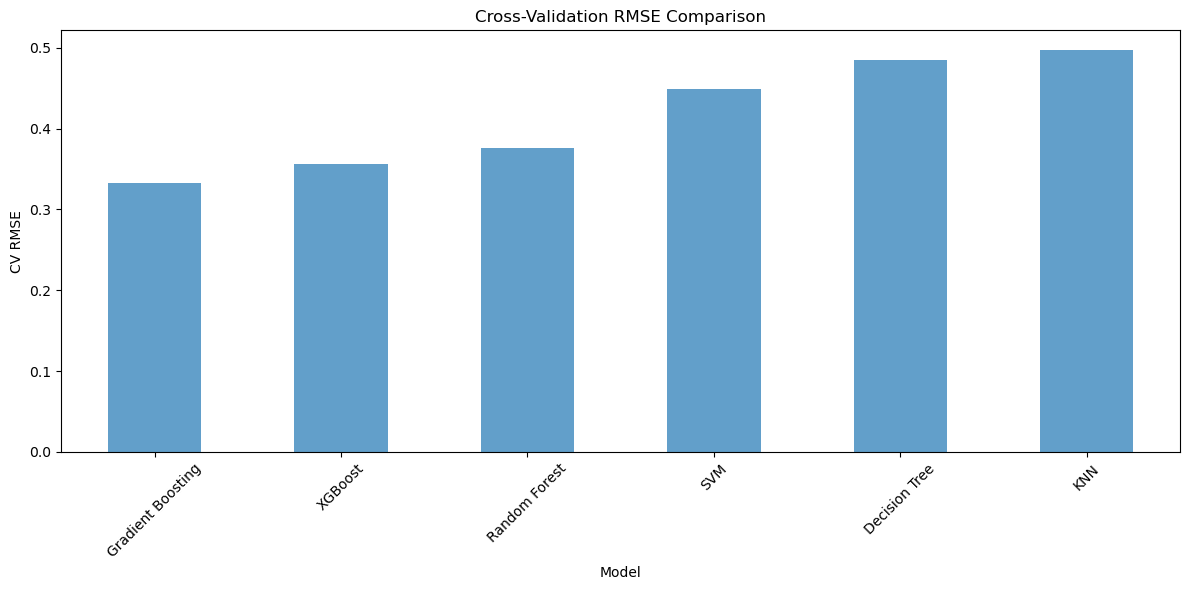

In [48]:
# Plotting
plt.figure(figsize=(12, 6))
df_eval_metrics['CV RMSE'].sort_values().plot(kind='bar', alpha=0.7)
plt.title('Cross-Validation RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('CV RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Model')

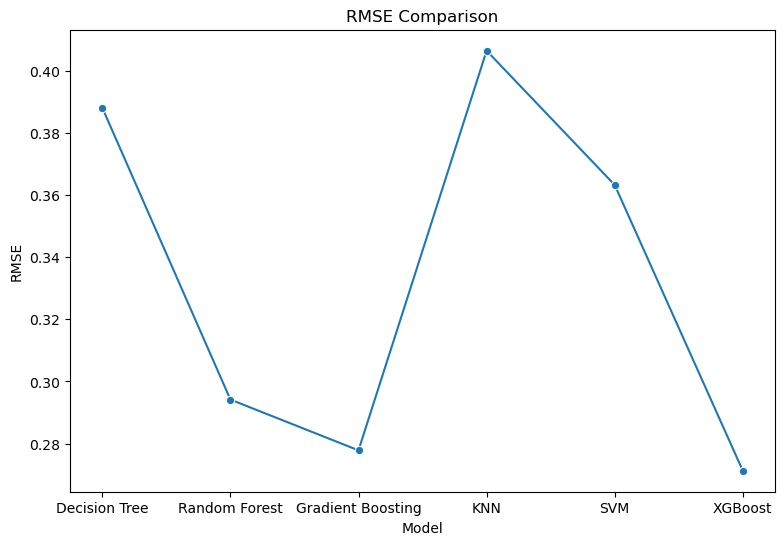

In [49]:
# Plotting metrics
plt.figure(figsize=(20, 6))

# RMSE comparison
plt.subplot(1, 2, 1)
sns.lineplot(data=df_eval_metrics, x=df_eval_metrics.index, y='RMSE', marker='o')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')

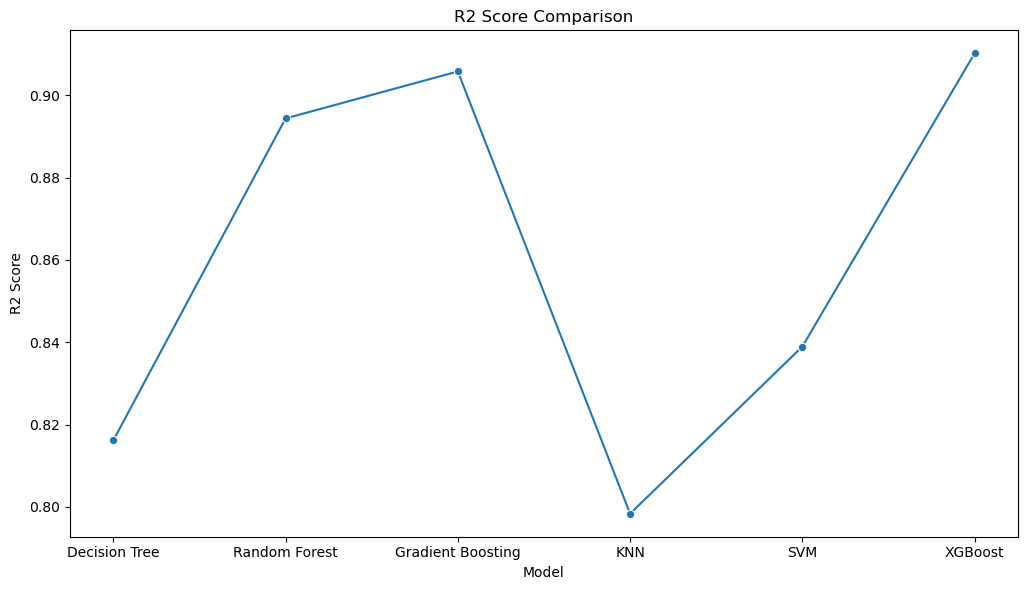

In [50]:
# R2 Score comparison
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.lineplot(data=df_eval_metrics, x=df_eval_metrics.index, y='R2', marker='o')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

In [51]:
# Display the metrics table
df_eval_metrics

,CV RMSE,MAE,MSE,RMSE,R2
Decision Tree,0.484872,0.277876,0.150588,0.388057,0.816155
Random Forest,0.376191,0.190603,0.086531,0.294161,0.894359
Gradient Boosting,0.332855,0.182408,0.077186,0.277824,0.905767
KNN,0.496686,0.268435,0.165182,0.406426,0.798337
SVM,0.448375,0.235250,0.131934,0.363228,0.838928
XGBoost,0.355961,0.178966,0.073584,0.271264,0.910165


In [52]:
# Identify best model
best_model_name = df_eval_metrics['CV RMSE'].idxmin()
print(f'Best Model: {best_model_name}')

Best Model: Gradient Boosting


## Conclusion: Modeling Summary

##### Linear Regression: 
The Linear Regression model performed very poorly, exhibiting extremely high errors and a negative R2 score. It is not suitable for predicting house prices in this dataset due to its poor performance.

##### Decision Tree, Random Forest, Gradient Boosting, KNN, SVM, XGBoost: 
These models demonstrated varying degrees of performance in predicting house prices.

Decision Tree: Moderate performance with moderate errors and R2 score.

Random Forest: Good performance with low errors and a high R2 score.

Gradient Boosting: Strong performance with low errors and a high R2 score.

KNN: Moderate performance with moderate errors and R2 score.

SVM: Moderate performance with moderate errors and R2 score.

XGBoost: Excellent performance with low errors and a high R2 score, outperforming other models.

Based on the evaluation results, actions taken, and comparison of models, the Gradient Boosting and XGBoost models stand out as the top performers. Both models demonstrated strong performance, with low errors and high R2 scores, indicating their effectiveness in predicting house prices in this dataset. However, XGBoost slightly outperformed Gradient Boosting in terms of cross-validation RMSE. Therefore, the XGBoost model is recommended as the best model for predicting house prices in this scenario. Further optimization and fine-tuning of hyperparameters could potentially improve the model's performance even further.